In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [4]:
data_dir = 'data'

In [5]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            

Image not in ext list data\sad\3eaf8508df7d4e439446b3426432e624.webp
Image not in ext list data\sad\66535186.jpg
Image not in ext list data\sad\CC_HE_1221887081_SituationalDepression.jpg
Image not in ext list data\sad\close-up-man-portrait-black-and-white-crying-tears-emotional-1296x728-header-1024x575.jpg
Image not in ext list data\sad\depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in ext list data\sad\depositphotos_210655610-stock-photo-sad-man-sitting-floor-home.jpg
Image not in ext list data\sad\feeling-sad-depressed-people-problems-600w-1186386160.jpg
Image not in ext list data\sad\ng-sad-crying-broken-heart-upset-tired-and-bored-with-hand-on-his-2230924265.jpg
Image not in ext list data\sad\sad-serious-portrait-exercise-headphones-732x549-thumbnail.jpg
Image not in ext list data\sad\sadness-overview-guide-1440x810.jpg
Image not in ext list data\sad\Sadness-vs-Depression.jpg
Image not in ext list data\sad\silhouette-sad-person-feeling-down-1

## Load Data

In [7]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [8]:
import numpy as np

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 279 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

In [12]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [13]:
# Class 1 = sad people, Class 0 = happy people
batch[1]

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1])

fig, ax = plt.subplots(ncols = 4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
scaled = batch[0] /255

In [15]:
scaled.max()

1.0

# 2. Preprocess data

### 2.1 Scale Data

In [16]:
data = data.map(lambda x, y : (x/255, y))

In [17]:
scaled_iterator = data.as_numpy_iterator().next()[0].max()

### 2.2 Split Data

In [18]:
len(data)

9

In [19]:
train_size = int(len(data) * 0.7)
val_size = int(len(data)* .2) + 1
test_size = int(len(data) * .1) + 1

In [20]:
train_size + val_size + test_size

9

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [22]:
len(test)

1

# 3. Deep Model

### 3.1 Build Deep Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential([
    Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3), padding='same'),
    MaxPooling2D(),

    Conv2D(32, (3, 3), 1, activation='relu', padding='same'),
    MaxPooling2D(),

    Conv2D(16, (3, 3), 1, activation='relu', padding='same'),
    MaxPooling2D(),

    Flatten(),

    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 16)       0

### 3.2 Train

In [27]:
logdir = 'logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [29]:
hist = model.fit(train,
                 epochs = 20,
                 validation_data=val,
                 callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 7s 368ms/step - loss: 0.7641 - accuracy: 0.4635 - val_loss: 0.6645 - val_accuracy: 0.6094
Epoch 2/20
6/6 [==============================] - 3s 353ms/step - loss: 0.6287 - accuracy: 0.7344 - val_loss: 0.5551 - val_accuracy: 0.6562
Epoch 3/20
6/6 [==============================] - 2s 238ms/step - loss: 0.4672 - accuracy: 0.7917 - val_loss: 0.6052 - val_accuracy: 0.6406
Epoch 4/20
6/6 [==============================] - 3s 393ms/step - loss: 0.3939 - accuracy: 0.8438 - val_loss: 0.2908 - val_accuracy: 0.9219
Epoch 5/20
6/6 [==============================] - 2s 343ms/step - loss: 0.2882 - accuracy: 0.9010 - val_loss: 0.3764 - val_accuracy: 0.8594
Epoch 6/20
6/6 [==============================] - 2s 255ms/step - loss: 0.2239 - accuracy: 0.9167 - val_loss: 0.2097 - val_accuracy: 0.9375
Epoch 7/20
6/6 [==============================] - 2s 280ms/step - loss: 0.1655 - accuracy: 0.9427 - val_loss: 0.2451 - val_accuracy: 0.9062
Epoch 8/20
6/6 [====

In [30]:
hist.history

{'loss': [0.7640941143035889,
  0.6287312507629395,
  0.46721258759498596,
  0.39388421177864075,
  0.28819650411605835,
  0.2238624542951584,
  0.1654588133096695,
  0.12795217335224152,
  0.07874422520399094,
  0.05671270564198494,
  0.03557049110531807,
  0.0323365293443203,
  0.02181350253522396,
  0.030287645757198334,
  0.012297139503061771,
  0.007674162741750479,
  0.006335873156785965,
  0.006417289841920137,
  0.0034331995993852615,
  0.0022389397490769625],
 'accuracy': [0.4635416567325592,
  0.734375,
  0.7916666865348816,
  0.84375,
  0.9010416865348816,
  0.9166666865348816,
  0.9427083134651184,
  0.9583333134651184,
  0.984375,
  0.984375,
  0.9947916865348816,
  0.9947916865348816,
  0.9947916865348816,
  0.9947916865348816,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6644564867019653,
  0.555109977722168,
  0.605183482170105,
  0.29082760214805603,
  0.37638795375823975,
  0.20967626571655273,
  0.24505898356437683,
  0.1052507609128952,
  0.07245612144

### 3.3 Plot Performance

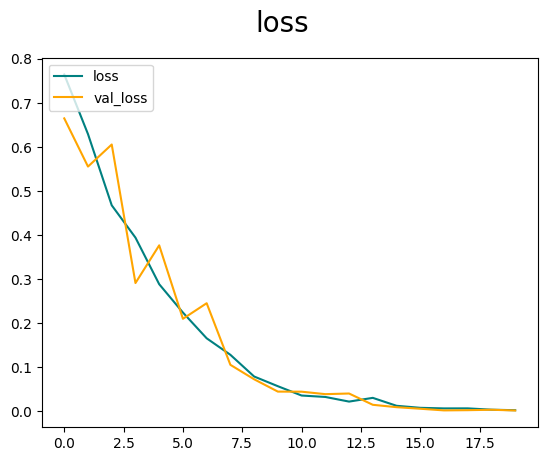

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance

### 4.1 Evaluate

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 354ms/step


In [35]:
print(f'Precision :{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()} ')

Precision :1.0, Recall:1.0, Accuracy:1.0 


### 4.2 Test

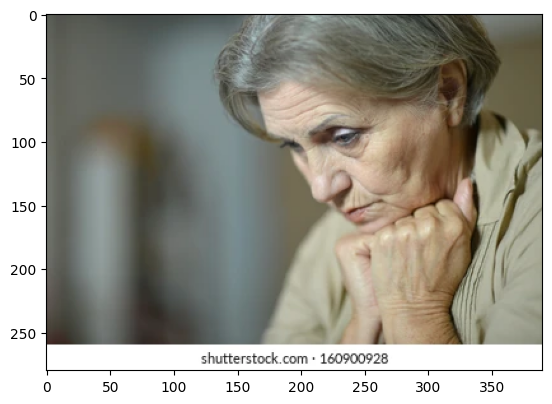

In [36]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

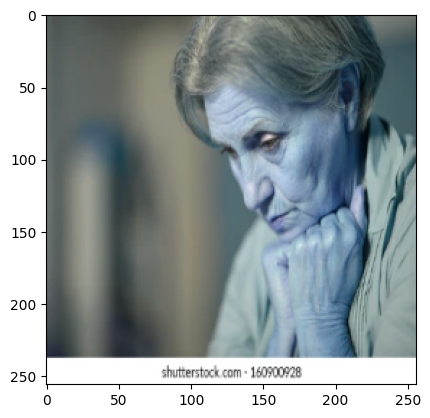

In [37]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 98ms/step


In [39]:
yhat

array([[0.9123047]], dtype=float32)

In [40]:
if yhat > 0.5:
    print(f'Predicted class in Sad')
else:
    print(f'Predicted class is Happy')

Predicted class in Sad


# 5. Save the Model

### 5.1 Save the Model

In [42]:
from tensorflow.keras.models import load_model

In [44]:
model.save(os.path.join('models', "happysadmodel.h5"))

In [ ]:
new_model = load_model(os.path.join("models", ''))